<a href="https://colab.research.google.com/github/OMatheusWander/DataScienceUFSC/blob/main/Data_Analytics_I.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introdução à Dados Analíticos

## 1) Just to Remember
## 2) Verificação de Normalidade
## 3) Z-Score
## 4) Intervalo de Confiança
## 5) Teste a diferença entre dois grupos
### 5.1) Teste t
### 5.2) Teste não paramétrico wilcoxon-test
## 6) ANOVA (Analysis of variance)
### 6.1) One-way ANOVA
### 6.2) Two-way ANOVA




In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 1) Just to Remember
## Parâmetro, População, Estatística, Amostra

### Parâmetro é uma Característica da População (i.e. média)
### Estatística é a Característica da Amostra.


![alt text](https://image.slidesharecdn.com/aula02-populaoamostraedados-121028115619-phpapp01/95/aula-02-populao-amostra-e-dados-2-638.jpg?cb=1351425435)



---


## Observação de Dados Quantitativos por BoxPlot

![alt text](https://d2mvzyuse3lwjc.cloudfront.net/doc/en/UserGuide/images/Creating_Box_Charts/Creating_Box_Charts_image871.gif?v=11111)



---

### Média: somatório de todos os números dividido pela quantidade de números.

### Mediana: É o valor médio obtido, depois de organizar os valores em modo acendente. (mais imune a outliers). Exemplo:  {1, 3, 3, 6, 7, 8, 9}, a mediana é 6. Para o conjunto {3, 5, 7, 9}, na qual há um numero par de valores, a mediana é a média dos valores do meio: (5+7)/2 = 6.

### Moda: o número mais comum.


### Exemplo da maior imunidade a outliers:

### Considere os salários: 25k, 27k, 29k, 35k, 37k:
### Média: 30,6
### Mediana: 29

### Agora considere o dono da empresa junto aos salários dos funcionários: 25k, 27k, 29k, 35k, 37k, 10M
### Média: 230,6K
### Mediana: 32K


---
## Medidas de Variação:

###  Desvio padrão: é medida de dispersão dos dados em relação à média, ou seja, a distância que cada indivíduo da amostra está em relação à média da amostra.

###  Erro Padrão: Estima quão preciso é a estimativa da média, isto é, quão longe a média da amostra está em relação à média da população.

###  Interqualite Range (IRQ): é uma medida de dispersão estatística, sendo igual à diferença entre os percentis 75 e 25.


# Dados Normalmente Distribuídos

![alt text](https://www.inf.ufsc.br/~andre.zibetti/probabilidade/figures/normal.PNG)

# 2) Verificação de Normalidade

### Verificação de Normalidade com teste de Shapiro-Wilks
#### Teste para normalidade
#### H0: Os dados são normalmente distribuídos
#### Aceitar H0 é p_valor > 0,05

## API:



```
import scipy
shapiro_results = scipy.stats.shapiro(variavel)
print(shapiro_results)
```
### O resultado dispoe dois valores, **valor W**, valor de **teste Shapiro** e o** p_valor**.
#### Se **W = 1**, os dados são **normais**. Se **W < 1**, é necessário verificar o** valor_p**. Se o **valor_p** for menor que **0.05**, nós** rejeitamos a hipótese nula**, sendo assim,  não podemos afirmar que os dados apresentados na variável estão em  distribuição normal!



## Aplicação do teste de verificação de normalidade
## Países da América Latina que Produzem e Consomem Energia Renovável

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:

import pandas as pd

indicadores =  pd.read_csv('/content/gdrive/MyDrive/Indicators.csv')

paises_al = ['ARG', 'BOL', 'BRA', 'CHL', 'COL', 'ECU', 'FLK','GUF', 'GUY', 'PRY', 'PER', 'SUR', 'URY', 'VEN', 'CRI', 'CUB', 'SLV', 'GTM', 'HTI', 'HND', 'MEX', 'NIC', 'PAN', 'DOM']


In [ ]:
indicadores.columns


Index(['CountryName', 'CountryCode', 'IndicatorName', 'IndicatorCode', 'Year',
       'Value'],
      dtype='object')

In [ ]:
prod_energ_renovagel = indicadores[(indicadores['CountryCode'].isin(paises_al)) & (indicadores['IndicatorName'] ==
'Renewable electricity output (% of total electricity output)')]
prod_energ_renovagel
pivot_prod_energ_renov = pd.pivot_table(prod_energ_renovagel, values = 'Value', index=['Year'], columns='CountryName')


In [ ]:
cons_energ_renovagel = indicadores[(indicadores['CountryCode'].isin(paises_al)) & (indicadores['IndicatorName'] ==
'Renewable energy consumption (% of total final energy consumption)')]
cons_energ_renovagel
pivot_cons_energ_renov = pd.pivot_table(cons_energ_renovagel, values = 'Value', index=['Year'], columns='CountryName')


In [ ]:
ondedataset =pd.merge(pivot_prod_energ_renov,pivot_cons_energ_renov, left_index=True, right_index=True )
ondedataset.boxplot(figsize=(30,22))

In [ ]:
prod_energ_renovagel.shape, indicadores.shape

((506, 6), (5656458, 6))

In [ ]:
prod_energ_renovagel = indicadores[(indicadores['CountryCode'].isin(paises_al)) & (indicadores['IndicatorName'] ==
'Renewable electricity output (% of total electricity output)')]
prod_energ_renovagel
pivot_prod_energ_renov = pd.pivot_table(prod_energ_renovagel, values = 'Value', index=['Year'], columns='CountryName')


In [ ]:
pivot_prod_energ_renov.head(5)

CountryName,Argentina,Bolivia,Brazil,Chile,Colombia,Costa Rica,Cuba,Dominican Republic,Ecuador,El Salvador,...,Haiti,Honduras,Mexico,Nicaragua,Panama,Paraguay,Peru,Suriname,Uruguay,"Venezuela, RB"
Year,,,,,,,,,,,,,,,,,,,,,
1990,35.441466,52.422145,94.500518,53.837361,76.384190,97.520185,10.250266,10.113575,78.547803,93.192065,...,79.396985,98.275119,24.693319,61.358957,85.268696,99.974251,76.803302,77.118644,94.948952,62.343858
1991,30.436566,58.875220,94.625753,70.973398,75.682617,94.875776,10.334415,13.658537,72.770290,73.704832,...,74.572650,98.550725,22.388582,60.252157,74.408602,99.962523,80.272062,80.282595,87.904260,70.325402
1992,34.870528,54.145937,94.419440,82.694630,68.665007,82.837948,12.289825,10.016126,69.121734,75.860621,...,75.886525,93.555271,25.655558,50.945699,66.724079,99.959471,74.851395,80.483153,89.762895,70.093416
1993,38.934000,58.279894,95.254707,81.664792,73.253974,89.922638,8.807490,21.744816,78.396977,68.199784,...,75.274725,88.134270,25.396357,57.002882,74.261201,99.955465,80.415991,79.911839,92.228629,68.429852
1994,42.624705,48.158640,95.405340,74.265142,78.492598,90.146580,7.906394,10.224659,80.611493,58.945027,...,82.918149,77.815846,19.021824,48.453608,71.972627,99.980778,81.091643,79.575265,98.792492,72.006852


In [ ]:
cons_energ_renovagel = indicadores[(indicadores['CountryCode'].isin(paises_al)) & (indicadores['IndicatorName'] ==
'Renewable energy consumption (% of total final energy consumption)')]
cons_energ_renovagel
pivot_cons_energ_renov = pd.pivot_table(cons_energ_renovagel, values = 'Value', index=['Year'], columns='CountryName')



In [ ]:
ondedataset =pd.merge(pivot_prod_energ_renov,pivot_cons_energ_renov, left_index=True, right_index=True )
ondedataset.head(5)

CountryName,Argentina_x,Bolivia_x,Brazil_x,Chile_x,Colombia_x,Costa Rica_x,Cuba_x,Dominican Republic_x,Ecuador_x,El Salvador_x,...,Haiti_y,Honduras_y,Mexico_y,Nicaragua_y,Panama_y,Paraguay_y,Peru_y,Suriname_y,Uruguay_y,"Venezuela, RB_y"
Year,,,,,,,,,,,,,,,,,,,,,
1990,35.441466,52.422145,94.500518,53.837361,76.384190,97.520185,10.250266,10.113575,78.547803,93.192065,...,81.119545,70.129092,14.217561,68.765928,43.589450,78.506446,39.425835,35.605104,44.812469,11.249142
1991,30.436566,58.875220,94.625753,70.973398,75.682617,94.875776,10.334415,13.658537,72.770290,73.704832,...,81.692361,70.201894,13.021500,70.523038,41.258409,79.150280,39.913116,37.997032,43.729824,12.335343
1992,34.870528,54.145937,94.419440,82.694630,68.665007,82.837948,12.289825,10.016126,69.121734,75.860621,...,83.427117,67.749121,13.197152,67.117240,40.216914,75.728100,37.307756,38.112745,43.399710,13.185393
1993,38.934000,58.279894,95.254707,81.664792,73.253974,89.922638,8.807490,21.744816,78.396977,68.199784,...,84.609708,66.725050,13.732168,67.561430,40.404742,72.612385,37.079257,15.146772,42.763082,12.371086
1994,42.624705,48.158640,95.405340,74.265142,78.492598,90.146580,7.906394,10.224659,80.611493,58.945027,...,95.039590,63.946870,12.320556,64.494468,38.312683,69.878600,35.934983,15.280275,42.250971,12.937404


In [ ]:
import scipy

variavel = ondedataset[['Argentina_x']]

shapiro_results = scipy.stats.shapiro(variavel)
print(shapiro_results)

ShapiroResult(statistic=0.9717175364494324, pvalue=0.7300340533256531)


In [ ]:
variavel = ondedataset[['Brazil_x']]

shapiro_results = scipy.stats.shapiro(variavel)
print(shapiro_results)

ShapiroResult(statistic=0.9119672179222107, pvalue=0.044941723346710205)


In [ ]:
variavel.hist()


In [ ]:
for statistic, pvalue in shapiro_results:


  if shapiro_results[1] < 0.05 :
    printf("passou no teste")
  else:
    printf("não passoupassou no teste")


In [ ]:
for col in ondedataset.columns:

  shapiro_results = scipy.stats.shapiro(ondedataset[[col]])
  if shapiro_results[0] < 1:
    if shapiro_results[1] < 0.05:
      print(f"A variável {col} não é normal, e o seu valor p é {shapiro_results[1]}")
    else:
      print(f"A variável {col}  é normal, e o seu valor p é {shapiro_results[1]}")
  else:
    print(f"A variável {col} é normal, e o seu valor W é {shapiro_results[0]}")


## Z-Score

### Z-Score é uma medida de quanto os dados estão longe da média ou abaixo ou acima. O valor deve variar entre -3 a 3.
### Z-Score é uma pontuação padrão: z = (valor - média) / desvio padrão

#### Exemplo:  se a média populacional e sd forem 40 e 10, respectivamente, para as pontuações das turmas, o que dizemos sobre o desempenho de um aluno que obteve 65?


In [ ]:
65-45/10 = 2,5

#Intro Scipy


<Axes: xlabel='Year'>

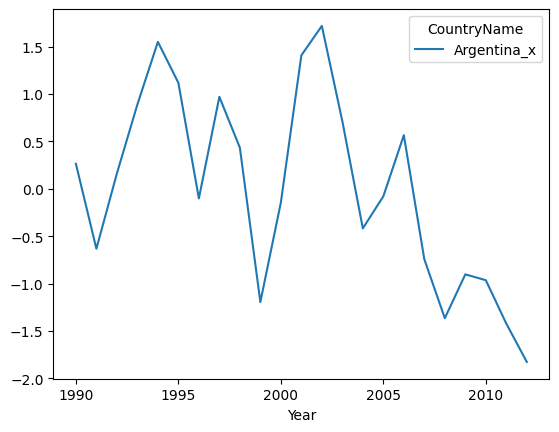

In [ ]:
from scipy.stats import zscore

ondedataset[['Argentina_x']].apply(zscore).plot()















##Qual país tem a maior quantidade de produção acima da média de energia renovável ao longo dos anos?


In [ ]:
ondedataset[[col]].apply(zscore).values

array([[ 0.26400461],
       [-0.63234572],
       [ 0.16175275],
       [ 0.88949844],
       [ 1.55048362],
       [ 1.11862929],
       [-0.10164276],
       [ 0.97062494],
       [ 0.43388987],
       [-1.19508725],
       [-0.14470558],
       [ 1.40813546],
       [ 1.71868394],
       [ 0.71358363],
       [-0.41774814],
       [-0.07919992],
       [ 0.5659996 ],
       [-0.74327518],
       [-1.36550205],
       [-0.90277563],
       [-0.96415543],
       [-1.42239022],
       [-1.82645827]])

In [ ]:
import numpy as np

threshold = 0.0

dict_country = {}

## {'Argentina_x':8, 'Brazil_x':10}

for col in ondedataset.columns:
  cond = ondedataset[[col]].apply(zscore).values > threshold
  dict_country[col] = np.sum(cond)

sorted_dict = dict(sorted(dict_country.items(), key=lambda item:item[1], reverse=True))
print(sorted_dict)

{'Paraguay_x': 16, 'Uruguay_x': 16, 'Venezuela, RB_x': 15, 'Cuba_y': 15, 'Peru_x': 14, 'Ecuador_y': 13, 'El Salvador_y': 13, 'Panama_y': 13, 'Bolivia_x': 12, 'Costa Rica_x': 12, 'Cuba_x': 12, 'Argentina_y': 12, 'Brazil_y': 12, 'Guatemala_y': 12, 'Uruguay_y': 12, 'Argentina_x': 11, 'Colombia_x': 11, 'Guatemala_x': 11, 'Panama_x': 11, 'Bolivia_y': 11, 'Chile_y': 11, 'Costa Rica_y': 11, 'Mexico_y': 11, 'Brazil_x': 10, 'Ecuador_x': 10, 'El Salvador_x': 10, 'Honduras_x': 10, 'Mexico_x': 10, 'Suriname_x': 10, 'Haiti_y': 10, 'Nicaragua_y': 10, 'Paraguay_y': 10, 'Peru_y': 10, 'Chile_x': 9, 'Dominican Republic_x': 9, 'Guyana_x': 9, 'Nicaragua_x': 9, 'Honduras_y': 9, 'Venezuela, RB_y': 9, 'Haiti_x': 8, 'Colombia_y': 8, 'Dominican Republic_y': 7, 'Guyana_y': 0, 'Suriname_y': 0}


In [ ]:
 ## Fertility rate, total (births per woman)
## Birth rate, crude (per 1,000 people)

In [ ]:
 ## Fertility rate, total (births per woman)

import numpy as np

threshold = 0.0

dict_frt = {}

for col2 in XXXX.columns:
  cond = ondedataset[[col2]].apply(zscore).values > threshold
  dict_frt[col2] = np.sum(cond)

sorted_frt = dict(sorted(dict_frt.items(), key=lambda item:item[1], reverse=True))
print(sorted_frt)

#### Isso significa que a nota  do aluno está 2.5 acima da média.

# 4) Intervalo de Confiança


## O IC indica quanto de incerteza há em uma amostra de uma população para um determinado parâmetro.

## O IC é computado para quantificar o grau de confiabilidade da amostra e o quanto ela reflete a população.

## Se computarmos o IC e der  95%, por exemplo, significa que se computarmos o IC para diferentes  amostras, 95% das amostras conterão a média da população.

## Para computar o IC, é necessário calcular a margem do erro, que expressa a quantidade do erro nos resultados de uma amostra aleatório.



---



## Exemplo:

### Se quisermos saber o peso médio dos alunos em uma escola, coletamos uma amostra para estimar o peso médio de todos os alunos de uma escola.

### A média da amostra geralmente não é exatamente igual à média da população.

### Um intervalo de confiança é um intervalo de valores acima e abaixo de uma estimativa pontual que captura o parâmetro populacional verdadeiro em algum nível de confiança predeterminado.


### Se você deseja ter uma chance de 95% de capturar o parâmetro populacional verdadeiro com uma estimativa pontual e um intervalo de confiança correspondente, defina seu nível de confiança para 95%.

### CI = Média + - Margem de erro
### onde MOE é Z * sd / sqrt (n) e n é o tamanho da amostra.


### Notas sobre a API de distribuição de Poisson:

#### 1) LOC é o ponto de referência N-dimensional da distribuição, sendo esse centróide escolhido apropriadamente para a função. Para esta aplicação, é simplesmente a extremidade esquerda da distribuição desejada (escalar). Esse padrão é 0 e só é alterado se o seu aplicativo iniciar em algo diferente de 0.
#### 2) MU é a média populacional

# 5) Testar a diferença entre dois grupos com o Teste **t**


###  - O t-test avalia se as médias de dois grupos são estatisticamente diferentes umas das outras.
###  - Esta análise é apropriada sempre que você quiser comparar as médias de dois grupos.
###  - O t-test é utilizado quando a amostra é pequena.


In [ ]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import ttest_1samp, wilcoxon, ttest_ind, mannwhitneyu
import scipy.stats as stats


### Teste t unilateral
#### Utilizar t_statistic se a amostra segue uma distribuição T (usado para amostras pequennas)
#### Produz o teste T: Serve para inferir suposições sobre a populaçãopor meio da amostra.
#### Essas suposições podem ser para verificar se os resultados estatísticos (exemplo média)  de um ou mais grupos são confiáveis (usando o valor_p), ou seja, se mantém se utilizarmos outras amostras.

### O resultado de T = (variancia entre os grupos)/(variância dentro do grupo)
### quanto maior o T, maior a diferença entre os grupos, quanto menor, menor a diferença
### Quanto maior o valor_p (acima de um corte limite 0,05), maior a chance de aceitar H0.


---


### Exemplo:
#### hipótese nula: valor médio esperado do fechamento do pregão para os 100 primeiros registros é 92000
#### rejeitar H0 se p for menor que 0.05



## Interpretando os resultados:

### Há uma chance de 5.926381948164481e-05 da amostra conter um padrão aleatório, que não correponde ao padrão da população. Ou seja, nesse caso, a chance é muito pequena. Isso significa, que a amostra é estatísticamente relevante e podemos com mais certeza rejeitar a H0, que diz que a média do fechamento do pregão é 92000



---



### p_value < 0.05 => hipótese alternativa:
### dados desviam significativamente da hipótese de que a média é de 9200 ao nível de significância de 5%






# > Será que esse foi o melhor teste??






## O Teste  **t**  podem ser aplicados quando os dados são normalmente distribuídos (são testes paramétricos) .
## Então primeiro verifica-se se os dados são normalmente distribuídos.


## Lembrando que o teste de Shapiro testa a hipótose, H0, na qual os dados seguem a distruibuição normal.
## O teste Rejeita H0, pois o valor-p é muito pequeno, menor que 0,05.


---


## Sendo Assim, para o caso de teste em distruibuições não normais, utiliza-se testes NÃO PARAMÉTRICOS, como  o Teste One-Sample:
### Testa a média de um grupo contra o conjunto das médias.
### Usa-se o teste de WILCOXON